## Part 2 : Feature Engineering
### 1) Exploratory Data Analysis

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
show = pd.read_csv('/home/xc2418/data/sampled_data_cleaned.csv', nrows = 2)
show

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_operatingSystem,geoNetwork_city,...,hits_page.searchCategory,hits_page.searchKeyword,hits_promotionActionInfo.promoIsClick,hits_promotionActionInfo.promoIsView,hits_referer,hits_social.hasSocialSourceReferral,hits_social.socialNetwork,hits_transaction.currencyCode,customDimensions_index,customDimensions_value
0,Paid Search,20171016,6135613929977117121,1508166431,10,1508166431,Safari,mobile,iOS,(not set),...,NaN,NaN,NaN,NaN,https://googleads.g.doubleclick.net/pagead/ads...,No,(not set),USD,4.0,North America
1,Organic Search,20171016,579247845938461901,1508165231,1,1508165231,Chrome,desktop,Windows,not available in demo dataset,...,NaN,NaN,NaN,NaN,https://www.google.co.uk/,No,(not set),USD,4.0,EMEA


In [6]:
df = pd.read_csv('/home/xc2418/data/sampled_data_cleaned.csv')

/home/xc2418/ENTER/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### (1)  Target Vriable -- totals_transactionRevenue

Since we need to predict the natural log of each 'fullVisitorId''s total revenue, let's add a column y (y = log(totals_transactionRevenue)) to our dataset.

In [7]:
# when we log(y), NANs change to 0
y = df['totals_transactionRevenue'].fillna(1, inplace = False) 
df['y'] = np.log(y)

In [8]:
# fill NANs with 0 (since NANs means no purchase in our data)
df['totals_transactionRevenue'].fillna(0, inplace = True)

revenue = df.groupby('fullVisitorId')['totals_transactionRevenue'].sum()
r = sum(revenue > 0)/len(revenue)
r

0.02408

The propotion of customers who purchased is only 2.4% in our sample.

In [9]:
df.to_csv("/home/xc2418/data/sampled_data_cleaned_1.csv", header = True, index = False)  

#### (2) Explore some important Variables -- Categorical

For an important feature, we want to explore its relationship to our target variable('totals_transactionRevenue').
In order to show the relationship, we'll define a functions to show 4 plots: <br>
    (1) a count of how many times a category show up in a certain feature. <br>
    (2) a count of how many times a category show up in a certain feature when revenue > 0. <br>
    (3) the total revenue of a category make in a certain feature. <br>
    (4) the mean revenue of a category make in a certain feature. 

In [18]:
def count_all(col, df = df, n_bars = 10):
    rev = df['totals_transactionRevenue']
    
    # 4 values
    count = df[col].value_counts(normalize = True)
    count_r = df[col].where(rev > 0).value_counts(normalize = True)
    total_r = df.groupby(col)['totals_transactionRevenue'].sum()
    mean_r = total_r/count_r
    
    # normalize
    total_rev = rev.sum()
    total_r = total_r/rev.sum()
    
    mean_r.fillna(0, inplace = True)
    mean_r = mean_r/(mean_r.sum())
    
    # concat to dataframe
    name = ['count', 'count (revenue>0)', 'total', 'mean']
    data = pd.concat([count, count_r, total_r, mean_r], axis = 1)
    data.columns = name
    
    data.sort_values(by = 'count', ascending = False, inplace = True)
    
    data.head(n_bars).plot(kind = 'bar', figsize = (n_bars*4, 10), fontsize = 20)
    plt.show()

##### (1) device

/home/xc2418/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



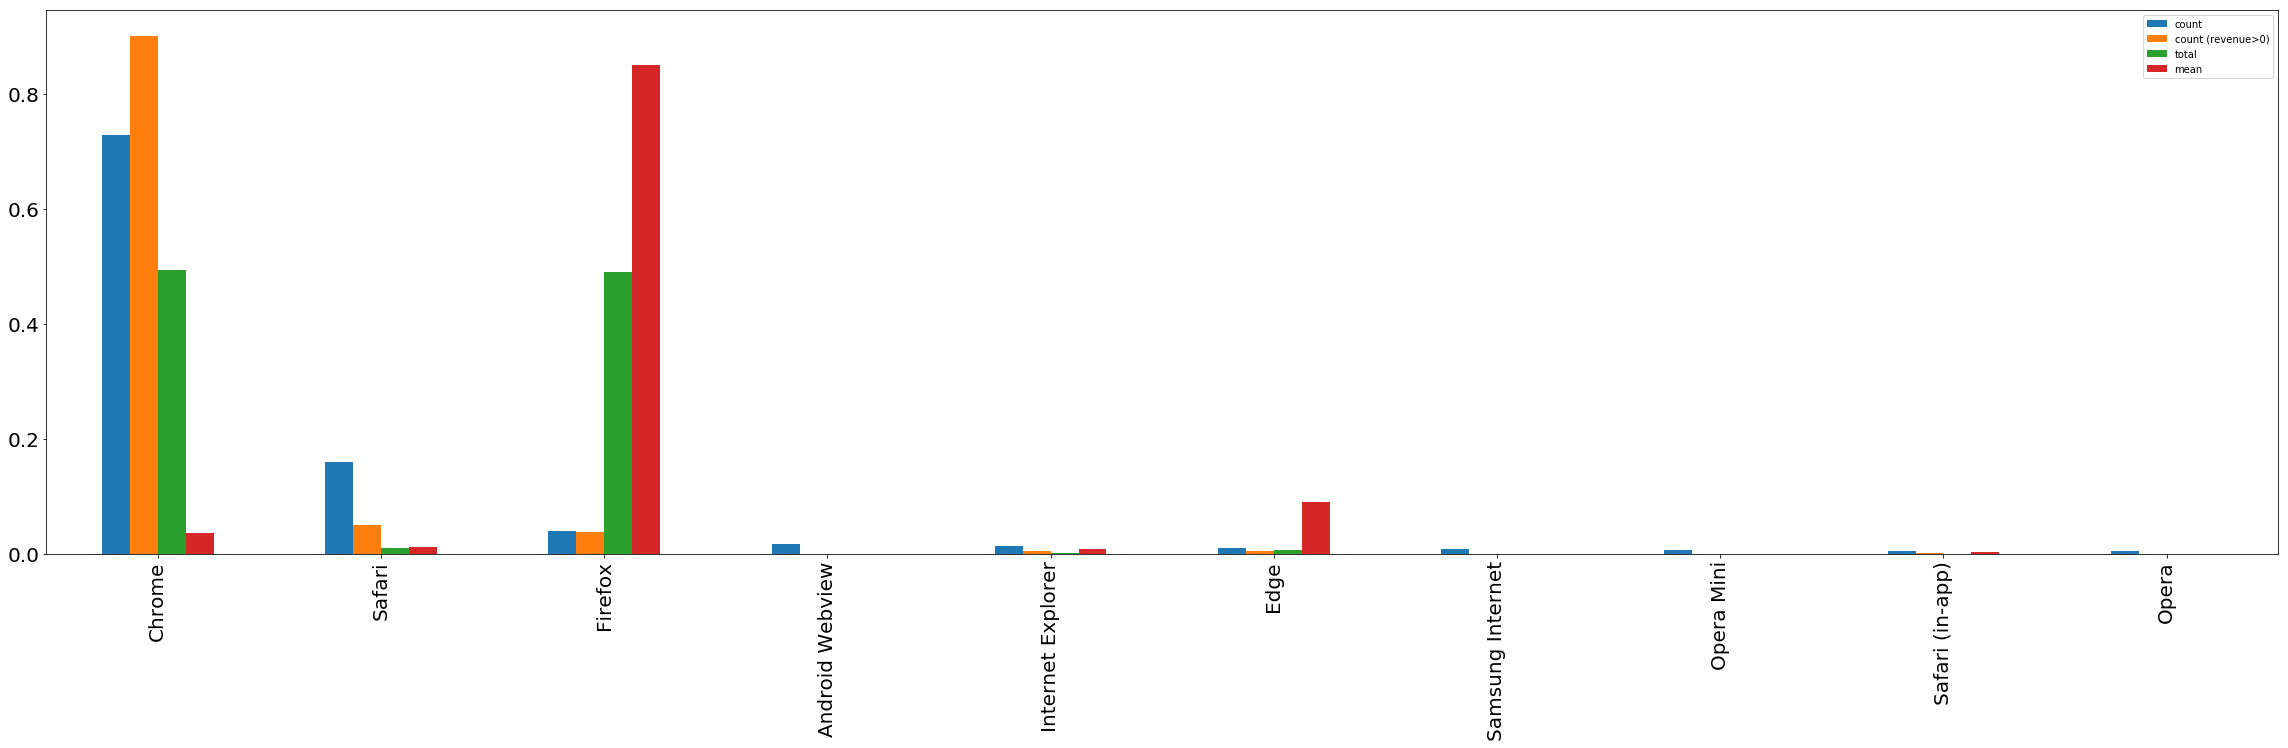

In [19]:
# device_browser
count_all('device_browser')

In [12]:
for col in df.columns:
    print(col, df[col].unique().size)

channelGrouping 8
date 638
fullVisitorId 25000
visitId 43698
visitNumber 441
visitStartTime 43765
device_browser 29
device_deviceCategory 3
device_operatingSystem 15
geoNetwork_city 395
geoNetwork_continent 6
geoNetwork_country 168
geoNetwork_metro 69
geoNetwork_networkDomain 3362
geoNetwork_region 263
geoNetwork_subContinent 22
totals_bounces 2
totals_hits 162
totals_newVisits 2
totals_pageviews 122
totals_sessionQualityDim 100
totals_timeOnSite 2147
totals_transactionRevenue 633
totals_transactions 5
trafficSource_adContent 43
trafficSource_adwordsClickInfo.adNetworkType 3
trafficSource_adwordsClickInfo.gclId 1312
trafficSource_adwordsClickInfo.isVideoAd 2
trafficSource_adwordsClickInfo.page 5
trafficSource_adwordsClickInfo.slot 4
trafficSource_isTrueDirect 2
trafficSource_keyword 163
trafficSource_medium 7
trafficSource_referralPath 606
trafficSource_source 75
hits_appInfo.exitScreenName 618
hits_appInfo.landingScreenName 488
hits_appInfo.screenName 488
hits_contentGroup.contentGrou